 <center><FONT COLOR=" orange" ><B><h2>PHONE COMPANY DATA CHURNING</h2> </B></center>

 <FONT COLOR="WHITE"> Formatting &<p>Cleaning </p>


In [92]:
import pandas as pd 
import numpy as numpy
import seaborn
import matplotlib

In [159]:
# Load the spreadsheet
#file_path = '/mnt/data/Databel - Data.csv'
df=pd.read_csv('Databel - Data 2.csv')

In [160]:
#print out the dataset understand the structure 
df.head()

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN


In [172]:
 #Standardize Header Names to Lower case and trailing spaces
#Objective: Make column names consistent for easier access and manipulation
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,customer_id,churn_label,account_length_(in_months),local_calls,local_mins,intl_calls,intl_mins,intl_active,intl_plan,extra_international_charges,...,senior,group,number_of_customers_in_group,device_protection_&_online_backup,contract_type,payment_method,monthly_charge,total_charges,churn_category,churn_reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN


In [173]:
#2. Convert 'Yes'/'No' Columns to Boolean
#Objective: Facilitate logical operations by using boolean values instead of strings.
yes_no_columns = ['intl_active', 'device_protection_&_online_backup', 'senior', 'group']
for col in yes_no_columns:
    df[col] = df[col].map({'Yes': True, 'No': False})
df.head(4)

,customer_id,churn_label,account_length_(in_months),local_calls,local_mins,intl_calls,intl_mins,intl_active,intl_plan,extra_international_charges,...,senior,group,number_of_customers_in_group,device_protection_&_online_backup,contract_type,payment_method,monthly_charge,total_charges,churn_category,churn_reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,False,no,0.0,...,False,False,0,False,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,False,no,0.0,...,False,False,0,True,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,False,yes,0.0,...,False,False,0,True,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,True,yes,0.0,...,False,False,0,False,Month-to-Month,Paper Check,17,177,NaN,NaN


In [97]:
#IDENTIFYIG MISSING VALUES
missing_values=df.isnull().sum()
print(missing_values[missing_values>0])

churn_category    4918
churn_reason      4918
dtype: int64


<B><center><h2> BEGINNING OF CUSTOMER CHURNING ANALYSIS </h2></center></B>

We'll start by filtering the dataset for churned customers and then proceed to analyze the reasons for churn based on contract type and churn category. This involves ensuring that the data related to churn reasons and contract types is clean and usable for analysis.

In [100]:
# Filter the dataset for churned customers
churned_customers=df[df['churn_label'] == 'Yes']

In [110]:
# Checking the structure of the filtered data, focusing on churn reason, churn category, and contract type
churned_customers=df[['churn_reason','churn_category','contract_type']].info()
churned_customers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   churn_reason    1769 non-null   object
 1   churn_category  1769 non-null   object
 2   contract_type   6687 non-null   object
dtypes: object(3)
memory usage: 156.9+ KB


In [19]:
# Also, let's get a summary of the unique values in 'churn_category' and 'contract_type' to understand the data better
churn_category_summary = df['churn_category'].value_counts()
contract_type_summary = df['contract_type'].value_counts()
churn_category_summary, contract_type_summary

(Competitor         805
 Attitude           287
 Dissatisfaction    286
 Price              200
 Other              191
 Name: churn_category, dtype: int64,
 Month-to-Month    3411
 Two Year          1797
 One Year          1479
 Name: contract_type, dtype: int64)

## Step 2: Churn Reason Analysis by Contract Type
Let's start by analyzing the churn reasons by contract type to see if there are patterns or trends that might inform strategies to reduce churn. 
<FONT COLOR="orange">Objective:</font>Understand how churn reasons distribute across contract types. 

In [111]:
churned_customers = df[df['churn_label'] == 'Yes']


In [112]:
# 2.1 GROUP DATA BY CONTRACT TYPE AND CHURN CATEGORY
churn_by_contract =churned_customers.groupby(['contract_type','churn_category',]).size().unstack(fill_value=0)
churn_by_contract

churn_category,Attitude,Competitor,Dissatisfaction,Other,Price
contract_type,,,,,
Month-to-Month,261,717,251,167,172
One Year,22,67,26,23,19
Two Year,4,21,9,1,9


WE CAN SEE THE THE HIGHEST CHURNING IS  BY COMPETITOR REASON AND PARTICULARLY OUR MONTH TO MONTH CLIENTS.
<!-- Columns: The columns are labeled with the different 'churn_category' names: "Attitude," "Competitor," "Dissatisfaction," "Other," and "Price." These categories represent the reasons why customers left the company.

Values: Each cell in the table contains the count of churned customers for each combination of 'contract_type' and 'churn_category'. For example:

There were 261 churned customers with "Month-to-Month" contracts due to "Attitude."
There were 717 churned customers with "Month-to-Month" contracts due to "Competitor."
For "One Year" contracts, 22 customers left due to "Attitude" and 67 due to "Competitor."
For "Two Year" contracts, there were only 4 churns due to "Attitude" and 21 due to "Competitor."
This data can be used to analyze churn patterns and potentially to identify areas where the company can improve to retain customers. For example, "Competitor" reasons are a significant cause of churn for "Month-to-Month" contracts, suggesting that customers in this group may be finding better offers or services with competitors.

<center><FONT color="ORANGE" ><b><h2>STEP 3. CHURNER BY PAYMENT METHOD AND CONTRACT TYPE & PERCENTAGE </h2></B></color></center>


CLICK HERE
<!-- The .size() method in pandas is used to count the number of elements in each group after applying a groupby operation. When followed by .unstack(fill_value=0), it converts the grouped data into a pivot table format, where the index values become the rows, the column values become the columns, and the count of elements in each group becomes the cell values.CLICK HERE:

<!--The fill_value=0 argument is used to specify a default value to fill in any missing values resulting from the unstacking operation.

In [21]:
churn_by_contract = df.groupby(['contract_type','payment_method']).size().unstack(fill_value=0)
churn_by_contract.head()

payment_method,Credit Card,Direct Debit,Paper Check
contract_type,,,
Month-to-Month,1069,2117,225
One Year,645,755,79
Two Year,900,830,67


<!--The resulting DataFrame, which you've provided a screenshot of, shows the number of customers for each contract type, broken down by their chosen payment method. For example, there are 1069 customers with a Month-to-Month contract who pay using a Credit Card, and there are 2117 Month-to-Month customers who pay using Direct Debit. This table helps you understand customer preferences and behaviors in terms of how they pay and what types of contracts they have.

In [22]:
# Calculate churn rate since we dont have an actual Total customers column we gonna make one .
# Values from the provided screenshot for each contract type and payment method
customers_by_contract_and_payment = {
    'Credit_Card': {'Month-to-Month': 1069, 'One Year': 645, 'Two Year': 900},
    'Direct_Debit': {'Month-to-Month': 2117, 'One Year': 755, 'Two Year': 830},
    'Paper_Check': {'Month-to-Month': 225, 'One Year': 79, 'Two Year': 67}
}

# Calculate the total number of customers
total_customers = sum(sum(contract.values()) for contract in customers_by_contract_and_payment.values())
total_customers


6687

CLICK HERE : You would add up all the numbers provided for each payment method across all contract types:

<!--For Credit Card:
Month-to-Month: 1069
One Year: 645
Two Year: 900
For Direct Debit:
Month-to-Month: 2117
One Year: 755
Two Year: 830
For Paper Check:
Month-to-Month: 225
One Year: 79
Two Year: 67
So the total number of customers would be the sum of all these values:

Total = (1069 + 645 + 900) + (2117 + 755 + 830) + (225 + 79 + 67)

You can calculate this total using a calculator or a simple addition. If you'd like, I

In [23]:
# Calculate the number of churned customers#you would load the dataset and count the number of rows where the churn label is 'Yes'.
number_of_churned_customers = df[df['churn_label'] == 'Yes'].shape[0]
number_of_churned_customers


1796

In [24]:
# Values from the provided data for customers paying by credit card for each contract type
customers_paying_by_credit_card = {
    'Month-to-Month': 1069,
    'One Year': 645,
    'Two Year': 900
}

# Calculate the sum of customers paying by credit card
sum_of_customers_paying_by_credit_card = sum(customers_paying_by_credit_card.values())

# Total number of customers paying by credit CARD
total_customers = 6687

# Calculate the percentage of customers that pay by credit card
percentage_customers_credit_card = (sum_of_customers_paying_by_credit_card / total_customers) * 100
percentage_customers_credit_card


39.090773141917154

40% PERCENTAGE OF CUSTOMERS PREFER TO PAY BY CREDIT CARD 


CLICK HERE:
<!--Month-to-Month: 1069 customers pay by credit card
One Year: 645 customers pay by credit card
Two Year: 900 customers pay by credit card  .i had already calculated The sum of  is 1069 + 645 + 900 = 2614 customers who pay by credit card.

<!--The total number of customers was provided as 6687.

So the calculation would be:
(2614 / 6687) * 100 = percentage of customers who pay by credit card

You can perform this calculation on a calculator to get the percentage. If you're using a Python environment locally, you can use the same formula as shown in the code snippet to get your result.

In [25]:
#total_customers = df.groupby(['contract_type','payment_method']).size().unstack(fill_value=0)

,customer_id,churn_label,account_length_(in_months),local_calls,local_mins,intl_calls,intl_mins,intl_active,intl_plan,extra_international_charges,...,senior,group,number_of_customers_in_group,device_protection_&_online_backup,contract_type,payment_method,monthly_charge,total_charges,churn_category,churn_reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,False,no,0.0,...,False,False,0,False,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,False,no,0.0,...,False,False,0,True,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,False,yes,0.0,...,False,False,0,True,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,True,yes,0.0,...,False,False,0,False,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,True,yes,0.0,...,False,False,0,False,One Year,Direct Debit,28,1720,NaN,NaN


<FONT color="ORANGE" ><b><h2>STEP 4. CHURNING BY AGE ,STATE AND CONTRACT TYPE </h2></B></color>


CLICK HERE 
<!-- churner_by_age = df.groupby(['account_length_(in_months)','contract_type','senior','under_30']).size().unstack(fill_value=0)
# Now churner_by_age is a DataFrame. You can display it using:
print(churner_by_age)

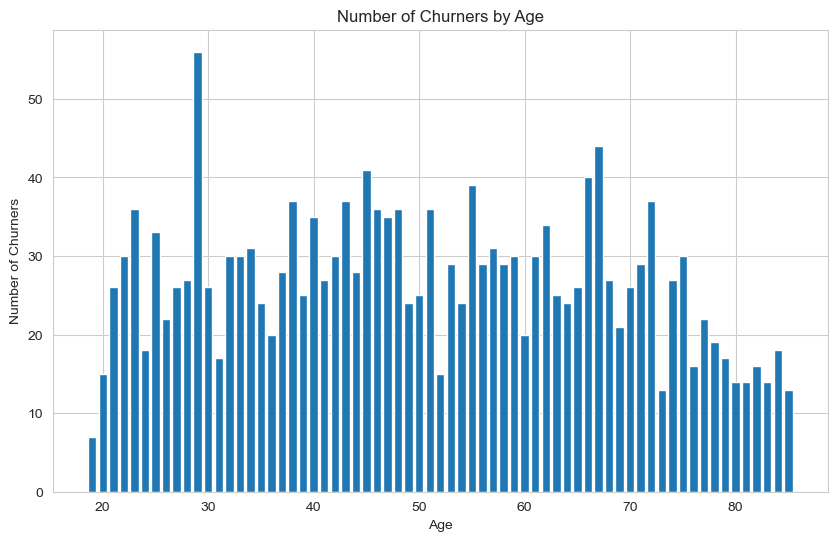

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for churned customers if not already done
churned_df = df[df['churn_label'] == 'Yes']

# Group by 'age' and count the number of churners
churners_by_age = churned_df.groupby('age').size()

# Convert the Series to a DataFrame for plotting
churners_by_age_df = churners_by_age.reset_index(name='number_of_churners')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(churners_by_age_df['age'], churners_by_age_df['number_of_churners'])  # Use 'age' here
plt.title('Number of Churners by Age')
plt.xlabel('Age')
plt.ylabel('Number of Churners')
plt.show()


<!--Check for Non-Empty Result: #After filtering the DataFrame, check to ensure the result is not empty before you attempt to plot it.
<!-- filtered_df = df[df['churn_label'] == 'Yes']
print(filtered_df)  # This should not be empty
churners_by_age = filtered_df.groupby('age').size()
print(churners_by_age)  # This should show age groups and their counts, and should not be empty


CLICK HERE: Churn by age
<!-- #churners_by_age = df[df['churn_label'] == 'Yes'].groupby('age').size().unstack(fill_value=0)
churner_by_age = df.groupby(['churn_label','state','contract_type','age']).size().unstack(fill_value=0)
churner_by_age .head()

<FONT color="ORANGE" ><b><h2> STEP.5 Number of Churners by Account Length Range, Contract Type, and Senior Status </h2></B></color>
<!-- # Now apply the groupby operation as per your code
churner_by_Age = df.groupby(['account_length_(in_months)','contract_type','senior','under_30']).size().unstack(fill_value=0)

# Display the first few rows
churner_by_Age.head()

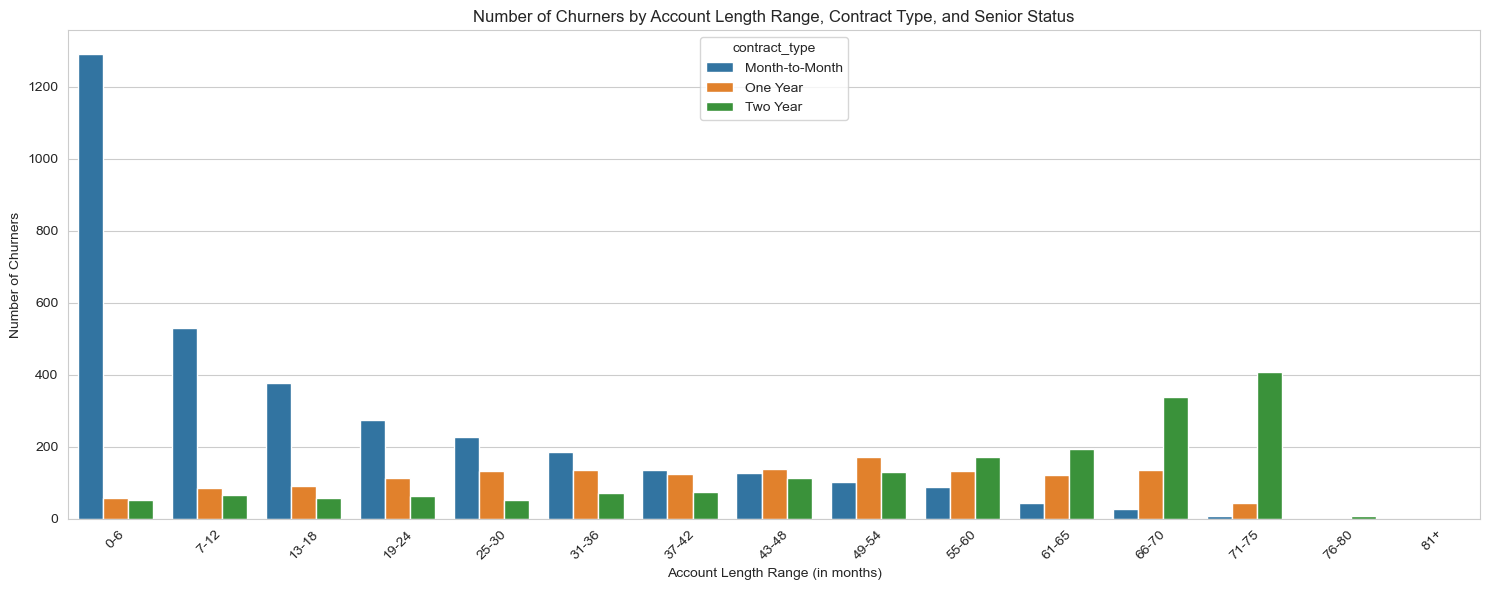

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# Bin the account lengths into ranges
df['account_length_range'] = pd.cut(df['account_length_(in_months)'],
                                    bins=[0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 65, 70, 75, 80, np.inf],
                                    labels=['0-6', '7-12', '13-18', '19-24', '25-30', '31-36', '37-42', '43-48', '49-54', '55-60', '61-65', '66-70', '71-75', '76-80', '81+'])

# Now create your visualization using the binned column
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='account_length_range', hue='contract_type')

# Add title and labels
plt.title('Number of Churners by Account Length Range, Contract Type, and Senior Status')
plt.xlabel('Account Length Range (in months)')
plt.ylabel('Number of Churners')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout() # Adjust layout to fit the x-axis labels
plt.show()


Here's an interpretation of the chart:

Month-to-Month Contracts: These show the highest number of churners across almost all account length ranges. There's a particularly high number of churners in the '0-6' months range, suggesting that many customers leave shortly after signing up. This could indicate issues with customer satisfaction, onboarding, or competition in the early months of the contract.

One Year Contracts: The churn numbers for One Year contracts are generally lower than for Month-to-Month contracts. This suggests that customers with longer-term commitments are less likely to churn, which could be due to a variety of factors such as satisfaction with the service, the hassle of changing providers, or early termination fees.

Two Year Contracts: This group has the lowest number of churners in most account length ranges, which might indicate a higher level of commitment or satisfaction, or again, potential financial disincentives to churn. However, there are noticeable spikes in certain ranges (e.g., '49-54' and '61-65' months), which could warrant further investigation.

Key Takeaways:
The high churn rate in the early months for Month-to-Month contracts might be a critical area to focus on for improving customer retention strategies.
Customers on longer contracts churn less frequently, which might indicate they are a more stable customer base.
The spikes in churn for specific account length ranges in Two Year contracts could be related to contract renewal points or other factors that are worth investigating.

 STEP.5 Number of Churners by Account Length Range, Contract Type, and Senior Status
# Filter for non-churned customers
<!--non_churned_df = df[df['churn_label'] == 'No']

# Group by 'age' and count the number of non-churned customers
total_customers_by_age_df = non_churned_df.groupby('age').size().reset_index(name='total_customers')


In [129]:
#Lets build a total customers BY AGE BY GROUPING "age."
# Assuming 'df' is your original DataFrame that includes all customers and an 'age' column
total_customers_by_age_df =df.groupby('age').size().reset_index(name='total_customers')
total_customers_by_age_df 

,age,total_customers
0,19,50
1,20,63
2,21,147
3,22,118
4,23,125
...,...,...
62,81,36
63,82,40
64,83,28
65,84,40


<FONT color="ORANGE" ><b><h2> STEP.6 Number of Churners and Churn Rate by Age </h2></B></color>

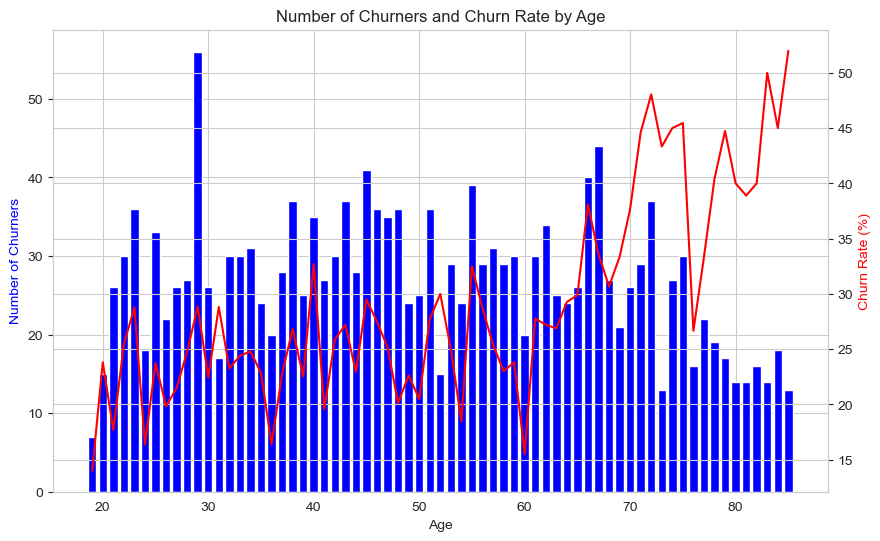

In [128]:
import matplotlib.pyplot as plt

# Assuming churners_by_age_df is your DataFrame with the number of churners by age
# and you have a DataFrame total_customers_by_age_df with the total number of customers by age

# Calculate churn rate
churners_by_age_df['churn_rate'] = (churners_by_age_df['number_of_churners'] / total_customers_by_age_df['total_customers']) * 100

# Create the figure and the first axis for the number of churners
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the number of churners by age
ax1.bar(churners_by_age_df['age'], churners_by_age_df['number_of_churners'], color='b')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Churners', color='b')

# Create the second axis for churn rate
ax2 = ax1.twinx()
ax2.plot(churners_by_age_df['age'], churners_by_age_df['churn_rate'], color='r')
ax2.set_ylabel('Churn Rate (%)', color='r')

# Show the plot with both the number of churners and the churn rate
plt.title('Number of Churners and Churn Rate by Age')
plt.show()


CLICK Here:  are the observations from the visualization:

<!--Churners by Age (Blue Bars): The number of churners varies across different ages. There are visible fluctuations indicating that some age groups have higher numbers of churners than others. Notably, there are peaks at certain ages which might be significant and warrant further investigation. However, the chart does not show a clear increasing or decreasing trend with age, suggesting that the likelihood of churning is not directly correlated with age alone.

Churn Rate by Age (Red Line): The churn rate also fluctuates across different ages but appears to show a general increasing trend as age increases, particularly past the age of approximately 60. The churn rate, which is the percentage of customers who have churned relative to the total number of customers in that age group, is particularly high in the older age groups. This may indicate that while there may be fewer customers in these age groups, a higher proportion of them are churning compared to the younger groups.

Peaks and Valleys: Both the number of churners and the churn rate show specific age groups where churn is particularly high or low. These peaks and valleys could be influenced by a variety of factors including lifestyle changes, service needs, or demographic-specific marketing strategies.

Potential Data Issues: The very high churn rates at the higher age end (over 45%) may indicate data issues such as a small sample size for those ages (which would make the churn rate percentage more volatile), or they could suggest that there are specific issues that affect customer retention in those age groups.

Key Insights:

Customer retention strategies may need to be tailored for different age groups, as the churn pattern is not uniform across the age spectrum.

The older demographic shows a high churn rate, which might suggest dissatisfaction or a change in requirements that are not being met by the current services offered.

Understanding why certain age groups have higher churn rates could involve qualitative research to gather more context about customer motivations and decisions.

To take action based on this chart, you would want to investigate the reasons behind the churn in the specific age groups with high churn rates. Additionally, customer feedback and market research could provide more insights into the factors influencing customer decisions in these groups.

In [136]:
# # Let's say you've identified that the age group of 30-40 has a high churn rate

high_churn_age_group = df[(df['churn_label'] == 'Yes') & (df['age'] >= 30) & (df['age'] <= 60)]
high_churn_age_group.head()

,customer_id,churn_label,account_length_(in_months),local_calls,local_mins,intl_calls,intl_mins,intl_active,intl_plan,extra_international_charges,...,senior,group,number_of_customers_in_group,device_protection_&_online_backup,contract_type,payment_method,monthly_charge,total_charges,churn_category,churn_reason
239,5509-KHCT,Yes,23,105,348.6,23.0,285.2,True,yes,0.0,...,False,False,0,False,Two Year,Credit Card,16,364,NaN,NaN
318,9843-UGSQ,Yes,29,113,205.2,116.0,232.0,True,no,116.0,...,False,False,0,False,Month-to-Month,Paper Check,30,872,NaN,NaN
408,8079-UPTX,Yes,9,48,136.5,90.0,84.6,True,no,21.2,...,False,False,0,False,Month-to-Month,Credit Card,60,545,NaN,NaN
592,7983-XVUQ,Yes,23,59,136.4,184.0,197.8,True,no,65.9,...,False,False,0,False,Month-to-Month,Direct Debit,37,846,NaN,NaN
637,6112-UTCV,Yes,56,384,563.3,0.0,0.0,False,no,0.0,...,False,False,0,False,One Year,Direct Debit,27,1532,NaN,NaN


In [194]:
# For example, you could check the distribution of another variable such as 'service_plan'
# Use groupby() on the DataFrame for multiple columns and then apply size() to get the count
service_plan_distribution = high_churn_age_group.groupby(['avg_monthly_gb_download', 'unlimited_data_plan', 'intl_plan']).size().reset_index(name='count')
service_plan_distribution.head()

,avg_monthly_gb_download,unlimited_data_plan,intl_plan,count
0,0,No,no,24
1,0,No,yes,3
2,1,No,no,2
3,1,Yes,no,19
4,1,Yes,yes,2


Average Monthly GB Download (avg_monthly_gb_download): <!-- This column likely represents the average gigabytes downloaded per month by the customers. The values range from 0 to higher numbers, with various counts of churners.
<!--Unlimited Data Plan (unlimited_data_plan): This column indicates whether the customer had an unlimited data plan ('Yes' or 'No'). It shows the distribution of churners between those with and without unlimited data.

International Plan (intl_plan): This column shows whether the customer was subscribed to an international plan ('yes' or 'no').

Count: The final column represents the number of churned customers for each combination of the above three categories.

Key Observations:

A large number of churners (24) have no data usage (avg_monthly_gb_download = 0) and no unlimited data plan. This could indicate that customers who do not use data or do not have unlimited plans are more likely to churn.

Some churners have moderate to high data usage and yet have opted out of unlimited data plans. This could suggest dissatisfaction with the data plan options or overage charges that may be prompting churn.

The presence of international plans does not appear to be a dominant factor in churn since the counts are relatively low for combinations where intl_plan is 'yes'.

Churn seems to occur across a range of data usage behaviors, from no usage to high usage.

<FONT color="ORANGE" ><b><h2> STEP.6 Churn Count by Average Monthly GB Download with Plan Details </h2></B></color>

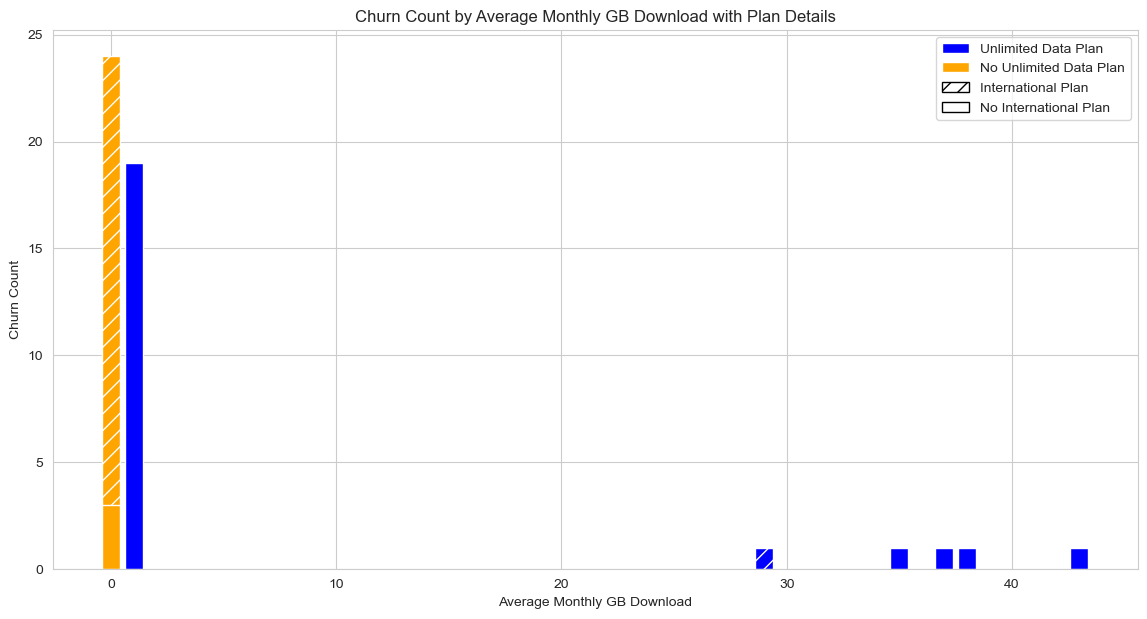

In [192]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and contains the columns of interest.
# We'll create a sample DataFrame for demonstration purposes.
# Let's simulate similar structure based on the provided information.

# Example DataFrame construction
df = pd.DataFrame({
    'avg_monthly_gb_download': [0, 0, 1, 1, 29, 35, 37, 38, 43],
    'unlimited_data_plan': ['No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'intl_plan': ['yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no'],
    'count': [24, 3, 2, 19, 1, 1, 1, 1, 1]
})

# Now, let's plot the distribution of churned customers by their data plan features.

# We'll create a bar plot where the x-axis will have the avg_monthly_gb_download,
# and the bar heights will represent the count of churners.
# We will differentiate unlimited_data_plan by color and intl_plan by hatch.

# First, let's sort the DataFrame to make the plot clearer.
df_sorted = df.sort_values('avg_monthly_gb_download')

# We need to define colors and hatches for the bars based on 'unlimited_data_plan' and 'intl_plan'.
colors = df_sorted['unlimited_data_plan'].map({'Yes': 'blue', 'No': 'orange'}).tolist()
hatches = df_sorted['intl_plan'].map({'yes': '//', 'no': ''}).tolist()

# Create a new figure and axis object.
plt.figure(figsize=(14, 7))
bars = plt.bar(df_sorted['avg_monthly_gb_download'], df_sorted['count'], color=colors)

# Adding hatches to bars
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

# Add some labels and title
plt.title('Churn Count by Average Monthly GB Download with Plan Details')
plt.xlabel('Average Monthly GB Download')
plt.ylabel('Churn Count')

# Create a custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', label='Unlimited Data Plan'),
    Patch(facecolor='orange', label='No Unlimited Data Plan'),
    Patch(facecolor='white', edgecolor='black', hatch='//', label='International Plan'),
    Patch(facecolor='white', edgecolor='black', label='No International Plan')
]
plt.legend(handles=legend_elements)

# Show the plot
plt.show()


CLICK HERE : Here are the concise interpretations:

<!--Data Usage: Most of the churn occurs at the zero data usage point, suggesting customers who do not use data or possibly have the lowest tier of data plans are churning.

Plan Type:

Unlimited Data Plan (Blue): A significant number of customers with zero data usage who churn do not have an unlimited data plan. This could indicate dissatisfaction among low data users who are on limited plans.
No Unlimited Data Plan (Orange with Stripes): The highest churn count is observed for customers with zero data usage who do not have an unlimited data plan.
International Plan (Hatched Bars): The pattern suggests that having an international plan does not have a significant effect on churn when the data usage is zero.
Higher Data Usage: There are very few churners with higher data usage, which could imply that customers who use more data tend to stick with their plans or are satisfied with the service provided.

Key Insight: The lack of data usage and the absence of an unlimited data plan are associated with higher churn.
 This might indicate an opportunity to review pricing or the value proposition of the lowest or limited data plans, especially for customers who do not opt for unlimited data plans. It may also be beneficial to explore why customers with zero data usage are leaving and consider strategies to engage them.